 ### Credit Card Fraud Detection 
 * Credit Card Fraud Detection dataset hosted on Kaggle
 * Goal: to detect fraudulent transactions from the total transactions

### Understanding the data
* Features are all numerical values, no missing values
* Features V1 to V28 are principle components obtained from PCA, they have been scaled. But we don't know what they stand for. 
* Only two columns have feature name: Time and Amount
* Class labels are unblanced, very low default rate 0.172%. Number of total case is 284807 and number of fraud is 492. 


* Handing the exceptional values 
* Dealing with imbalanced data (re-sampling)
* using exising various metrics, and defing new metrics to evaluate the model performance
* Logisitic regression 
* Simple neural network 
* Overfitting 

In [1474]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
df = pd.read_csv("creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
# check the missing value
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

0    284315
1       492
Name: Class, dtype: int64

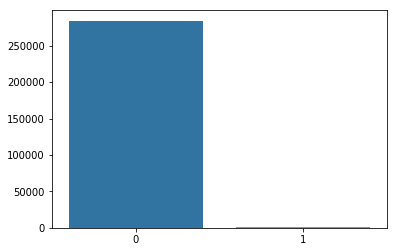

In [8]:
y = df["Class"].value_counts()
sns.barplot(y.index, y.values)
df["Class"].value_counts()

In [9]:
n_pos = df["Class"][df["Class"] == 1].shape[0]
n_neg = df["Class"][df["Class"] == 0].shape[0]
print ("Fraud Percentage = "+str( (n_pos / df["Class"].shape[0]) * 100 ))

Fraud Percentage = 0.1727485630620034


### Cleaning the data

#### Understanding Feature "Amount" 

* Plot the distribution of "Amount"
* The feature "Amount" in different transaction classes
* Most transactions: amounts < 100
* Max (non-fraud) = 25691.16 vs Max (fraud) = 2125.87
* log transformation on the positive skewed data

In [10]:
df_clean = df.copy()

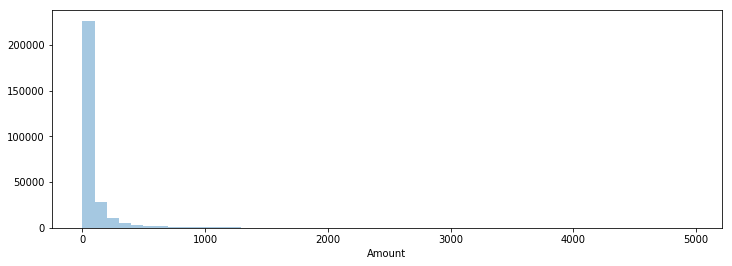

In [11]:
plt.figure(figsize=(12,4))
sns.distplot(df[df['Amount']<5000].Amount,kde=False,bins=50)

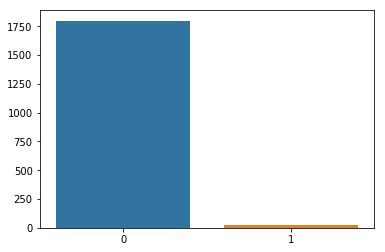

In [12]:
y = df[df['Amount']==0]["Class"].value_counts()
sns.barplot(y.index, y.values)

In [13]:
df.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


#### Log transform of amount

In [90]:
eps = 0.001 # acount for the zero amount 
df_clean['log_Amount'] = np.log(df['Amount']+eps)

In [91]:
df_clean.groupby('Class')['log_Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,2.943498,2.020493,-6.907755,1.731833,3.091088,4.344468,10.153902
1,492.0,2.127407,3.303417,-6.907755,0.001000,2.224722,4.662410,7.661937


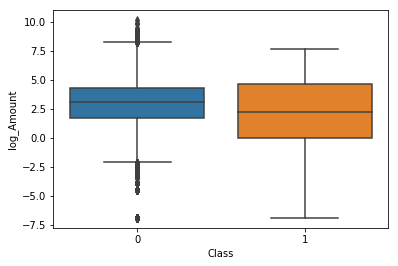

In [92]:
sns.boxplot(x='Class', y='log_Amount',data=df)

In [17]:
df_clean = df_clean.drop('Amount', axis=1)

#### Understanding feature Time vs Transaction 
* Time column is just the second after the first transaction. 
* The number of Transactions along the Time axes in two different transcatin classes
* There is a daily cycle of the number of transcation, i.e., off peak in the mid-night
* The default is assumed to not depends on the Time

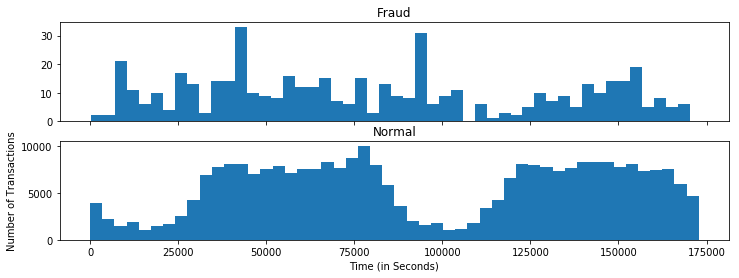

In [18]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = 50)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = 50)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

In [19]:
df_clean = df_clean.drop('Time', axis=1)

#### Understanding feature V1-V28
* Plot the distribution of V1-V28 
* We could drop the features that shows similar distribution for fraud and non-fraud
* But they may be important in sub-samples

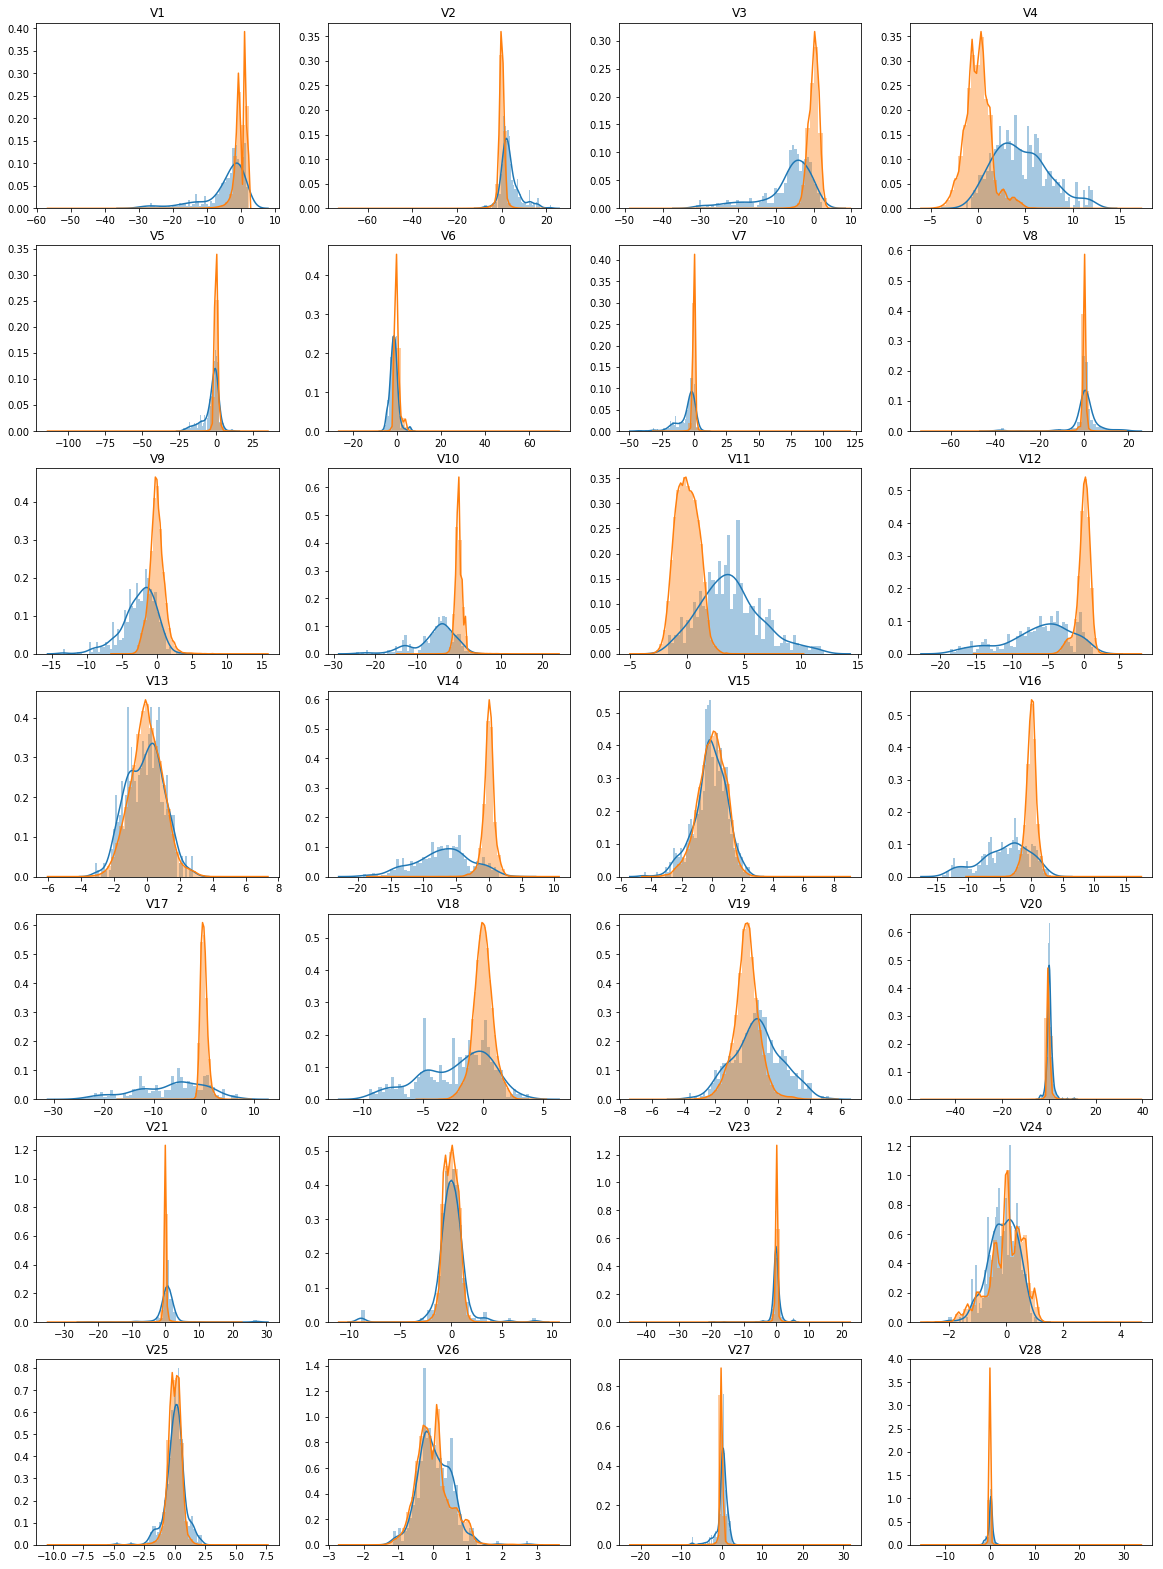

In [20]:
#Select only the anonymized features.
v_features = df.iloc[:,1:29].columns

plt.figure(figsize=(20,7*4))
gs = gridspec.GridSpec(7, 4)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title(str(cn))
plt.show()

In [184]:
# df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

## Modeling

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [142]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
V1            284807 non-null float64
V2            284807 non-null float64
V3            284807 non-null float64
V4            284807 non-null float64
V5            284807 non-null float64
V6            284807 non-null float64
V7            284807 non-null float64
V8            284807 non-null float64
V9            284807 non-null float64
V10           284807 non-null float64
V11           284807 non-null float64
V12           284807 non-null float64
V13           284807 non-null float64
V14           284807 non-null float64
V15           284807 non-null float64
V16           284807 non-null float64
V17           284807 non-null float64
V18           284807 non-null float64
V19           284807 non-null float64
V20           284807 non-null float64
V21           284807 non-null float64
V22           284807 non-null float64
V23           284807 non-null float64
V24           2

In [95]:
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=123)

### Without doing oversampling or downsampling

In [96]:
### Noramlizing the data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#X_train = np.clip(X_train, -5, 5)
#X_test_ = np.clip(X_test, -5, 5)

In [97]:
# Instantiate the classifier
from sklearn.model_selection import GridSearchCV
# hyperprameter tuning and cross-validataion
# Define grid of regularization parameters for model cross-validation
param_grid = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 10]}

# Instantiate the GridSearchCV object: logreg_cv
logreg = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)

# Fit to the training data
logreg.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [98]:
print("Tuned Logistic Regression Parameters: {}".format(logreg.best_params_)) 

Tuned Logistic Regression Parameters: {'C': 0.5, 'penalty': 'l1'}


In [99]:
# Predict the labels of the test set
y_pred_logreg = logreg.predict(X_test)

# Generate the probabilities
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]

In [100]:
# ROC curve
def plot_roc_curve(label, y_test, y_score, **kwargs):    
    """
    Args:
        y_true (array-like, shape (n_samples)): True labels of the data.

        y_score (array-like, shape (n_samples)): Target scores, can either be
            probability estimates of the positive class, confidence values, or
            non-thresholded measure of decisions (as returned by
            decision_function on some classifiers).
    """
    # Calculate the roc metrics
    fpr, tpr, thresholds = roc_curve(y_test, y_score)  
    
    # Area under ROC curve
    auc_result = roc_auc_score(y_test, y_score)

    plt.title('ROC Curve')
    plt.plot(fpr*100, tpr*100,              
        label=label+' AUC = {:.3f}'.format(auc_result), **kwargs)            
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate [%]')
    plt.ylabel('True Positive Rate [%]')
    plt.legend(loc='lower right')
    plt.axis([-1,100,0,100])
    plt.grid(True)     

In [101]:
# Gain
def plot_gain_curve(label, y_true, y_score, **kwargs):
    
    y_true, y_score = np.asarray(y_true), np.asarray(y_score)
    # make y_true a boolean vector
  #  y_true = (y_true == 1)

    sorted_indices = np.argsort(y_score)[::-1]
    y_true = y_true[sorted_indices]
    
    gains = np.cumsum(y_true)
    gains = gains / float(np.sum(y_true)) * 100.
        
    percentages = np.arange(start=1, stop=len(y_true) + 1)
    percentages = percentages / float(len(y_true)) * 100.
        
    gains = np.insert(gains, 0, [0])
    percentages = np.insert(percentages, 0, [0])

    plt.title('Gain Curve')
    plt.plot(percentages, gains, label=label, **kwargs)             
    plt.xlabel('Percentage of sample [%]')
    plt.ylabel('Percentage of positive [%]')
    plt.legend(loc='lower right')
    plt.axis([-1,100,0,100])
    plt.grid(True)

In [102]:
# 
def plot_TP_rate_vs_FP_ratio_curve(label, y_true, y_score, **kwargs):
    
    y_true, y_score = np.asarray(y_true), np.asarray(y_score)
    # make y_true a boolean vector
#    y_true = (y_true == 1)

    sorted_indices = np.argsort(y_score)[::-1]
    y_true = y_true[sorted_indices]
    gains = np.cumsum(y_true)
    
#    ratio = np.cumsum(y_true == False)/np.cumsum(y_true == True)
    ratio = np.cumsum(y_true == 0)/np.cumsum(y_true == 1)
    gains = gains / float(np.sum(y_true)) * 100.

    plt.title('Fraud Dectetion rate vs. False Positive Ratio')
    plt.plot(ratio, gains, label=label, **kwargs)             
    plt.xlabel('Flase Positive Ratio')
    plt.ylabel('Percentage of fraud detection rate [%]')
    
    x = np.array([0,5,10,15,20,25,30])
    my_xticks = ['0:1','5:1','10:1','15:1','20:1','25:1','30:1']
    plt.xticks(x, my_xticks)
        
    plt.legend(loc='lower right')
    plt.axis([0,30,0,100])
    plt.grid(True)        

### Upsampling the minority class 

In [125]:
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=123)

In [126]:
from sklearn.utils import resample

#combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)
# separate minority and majority classes
negative = train_data[train_data.Class==0]
positive = train_data[train_data.Class==1]
# upsample minority
pos_upsampled = resample(positive, replace=True, n_samples=len(negative), random_state=123) 
# combine majority and upsampled minority
upsampled = pd.concat([negative, pos_upsampled])
# check new class counts
upsampled.Class.value_counts()

X_train = upsampled.drop('Class', axis=1)
y_train = upsampled['Class']

In [127]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#param_grid = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 10]}

# Instantiate the GridSearchCV object: logreg_cv
logreg_up = LogisticRegression(solver='liblinear',penalty='l1',C=0.5)

# Fit to the training data
logreg_up.fit(X_train, y_train.values.ravel())

# Predict the labels of the test set
y_pred_logreg_up = logreg_up.predict(X_test)

# Generate the probabilities
y_pred_prob_logreg_up = logreg_up.predict_proba(X_test)[:, 1]

### Downsampling the majority class

In [137]:
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=123)

neg_downsampled = resample(negative, replace=True, n_samples=len(positive)*8, random_state=123) # reproducible results
# combine minority and downsampled majority
downsampled = pd.concat([positive, neg_downsampled])
# check new class counts
downsampled.Class.value_counts()

X_train = downsampled.drop('Class', axis=1)
y_train = downsampled['Class']

In [138]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

param_grid = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 10]}

# Instantiate the GridSearchCV object: logreg_cv
#logreg_up = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
logreg_dn = LogisticRegression(solver='liblinear',penalty='l1',C=0.5)

# Fit to the training data
logreg_dn.fit(X_train, y_train.values.ravel())

# Predict the labels of the test set
y_pred_logreg_dn = logreg_dn.predict(X_test)

# Generate the probabilities
y_pred_prob_logreg_dn = logreg_dn.predict_proba(X_test)[:, 1]

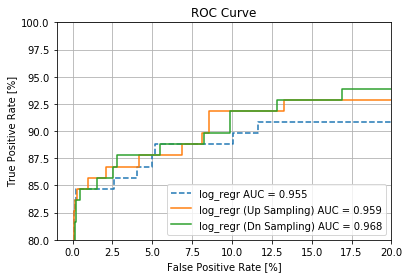

In [139]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_roc_curve('log_regr', y_test, y_pred_prob_logreg, color=colors[0], linestyle='--')
plot_roc_curve('log_regr (Up Sampling)', y_test, y_pred_prob_logreg_up,color=colors[1])
plot_roc_curve('log_regr (Dn Sampling)', y_test, y_pred_prob_logreg_dn,color=colors[2])
plt.axis([-1.,20,80,100])
plt.show()

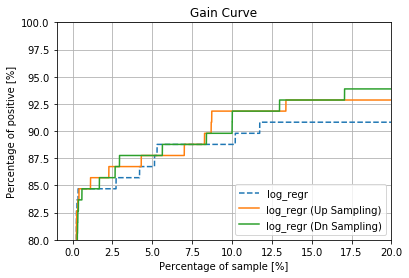

In [140]:
plot_gain_curve('log_regr', y_test, y_pred_prob_logreg, color=colors[0], linestyle='--')
plot_gain_curve('log_regr (Up Sampling)', y_test, y_pred_prob_logreg_up, color=colors[1])
plot_gain_curve('log_regr (Dn Sampling)', y_test, y_pred_prob_logreg_dn, color=colors[2])
plt.axis([-1.,20,80,100])
plt.show()

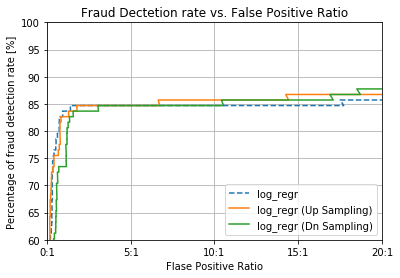

In [365]:
plot_TP_rate_vs_FP_ratio_curve('log_regr', y_test, y_pred_prob_logreg, color=colors[0], linestyle='--')
plot_TP_rate_vs_FP_ratio_curve('log_regr (Up Sampling)', y_test, y_pred_prob_logreg_up, color=colors[1])
plot_TP_rate_vs_FP_ratio_curve('log_regr (Dn Sampling)', y_test, y_pred_prob_logreg_dn, color=colors[2])
plt.axis([0,20,60,100])
plt.show()

In [133]:
# 
def plot_confusion_matrix(y_true, y_pred):

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    confmat = confusion_matrix(y_test,y_pred)
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.tight_layout()
    plt.show()

    # Print the accuracy
    #print('accuracy Score: {:.3f}'.format(accuracy_score(y_test,y_pred)))
    
    # Print the precision
    print('Precision Score: {:.3f}'.format(precision_score(y_test,y_pred)))

    # Print the recall
    print('Recall Score: {:.3f}'.format(recall_score(y_test, y_pred)))

    # Print the F1 score
    #print('f1-Score: {:.3f}'.format(f1_score(y_test, y_pred)))

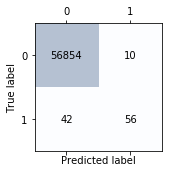

Precision Score: 0.848
Recall Score: 0.571


In [134]:
plot_confusion_matrix(y_test, y_pred_logreg)

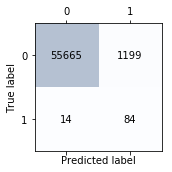

Precision Score: 0.065
Recall Score: 0.857


In [135]:
plot_confusion_matrix(y_test, y_pred_logreg_up)

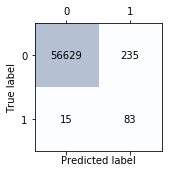

Precision Score: 0.261
Recall Score: 0.847


In [136]:
plot_confusion_matrix(y_test, y_pred_logreg_dn)

After the re-sampling, 
* the precision are lower because there are more FP (False alarm, flagging too many legitimate transactions as fraudulent), 
* but conversely the recall and AUC are higher because the model also found more TP (identifies more fraudulent transactions). 

Carefully consider the trade offs between these different types of errors for your application.

## DNN

In [254]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [255]:
print(tf.__version__)

2.0.0


In [351]:
X = df_clean.drop('Class', axis=1).values
y = df_clean['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=123)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [352]:
from tensorflow.keras.callbacks import EarlyStopping

In [353]:
EPOCHS = 100
BATCH_SIZE = 2048

In [354]:
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

#early_stop = EarlyStopping(monitor='val_auc', mode='max', verbose=1, patience=10, restore_best_weights=True)

In [355]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

In [356]:
output_initial_bias = np.log([n_pos/n_neg])
output_initial_bias = tf.keras.initializers.Constant(output_initial_bias)
#output_initial_bias = None
model = Sequential()
model.add(Dense(units=16, input_shape=(X_train.shape[-1],), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid',bias_initializer=output_initial_bias))

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                480       
_________________________________________________________________
dropout_18 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [357]:
## compile:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

In [358]:
## train:
hist = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(X_val, y_val))

history = hist.history

Train on 182276 samples, validate on 45569 samples
Epoch 1/100
182276/182276 [==============================] - 2s 12us/sample - loss: 0.0104 - tp: 75.0000 - fp: 64.0000 - tn: 181897.0000 - fn: 240.0000 - accuracy: 0.9983 - precision: 0.5396 - recall: 0.2381 - auc: 0.8173 - val_loss: 0.0066 - val_tp: 33.0000 - val_fp: 6.0000 - val_tn: 45484.0000 - val_fn: 46.0000 - val_accuracy: 0.9989 - val_precision: 0.8462 - val_recall: 0.4177 - val_auc: 0.9121
Epoch 2/100
182276/182276 [==============================] - 0s 2us/sample - loss: 0.0067 - tp: 159.0000 - fp: 34.0000 - tn: 181927.0000 - fn: 156.0000 - accuracy: 0.9990 - precision: 0.8238 - recall: 0.5048 - auc: 0.8999 - val_loss: 0.0055 - val_tp: 44.0000 - val_fp: 7.0000 - val_tn: 45483.0000 - val_fn: 35.0000 - val_accuracy: 0.9991 - val_precision: 0.8627 - val_recall: 0.5570 - val_auc: 0.9162
Epoch 3/100
182276/182276 [==============================] - 0s 2us/sample - loss: 0.0059 - tp: 179.0000 - fp: 38.0000 - tn: 181923.0000 - fn: 136.

182276/182276 [==============================] - 0s 2us/sample - loss: 0.0031 - tp: 215.0000 - fp: 31.0000 - tn: 181930.0000 - fn: 100.0000 - accuracy: 0.9993 - precision: 0.8740 - recall: 0.6825 - auc: 0.9581 - val_loss: 0.0032 - val_tp: 50.0000 - val_fp: 3.0000 - val_tn: 45487.0000 - val_fn: 29.0000 - val_accuracy: 0.9993 - val_precision: 0.9434 - val_recall: 0.6329 - val_auc: 0.9427
Epoch 42/100
182276/182276 [==============================] - 0s 2us/sample - loss: 0.0031 - tp: 212.0000 - fp: 31.0000 - tn: 181930.0000 - fn: 103.0000 - accuracy: 0.9993 - precision: 0.8724 - recall: 0.6730 - auc: 0.9486 - val_loss: 0.0031 - val_tp: 52.0000 - val_fp: 4.0000 - val_tn: 45486.0000 - val_fn: 27.0000 - val_accuracy: 0.9993 - val_precision: 0.9286 - val_recall: 0.6582 - val_auc: 0.9427
Epoch 43/100
182276/182276 [==============================] - 0s 2us/sample - loss: 0.0028 - tp: 216.0000 - fp: 27.0000 - tn: 181934.0000 - fn: 99.0000 - accuracy: 0.9993 - precision: 0.8889 - recall: 0.6857 -

In [359]:
def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
#  plt.semilogy(history.epoch,  history.history['loss'],color=colors[n], label='Train '+label)
#  plt.semilogy(history.epoch,  history.history['val_loss'],color=colors[n], label='Val '+label,linestyle="--")

  plt.plot(history.epoch,  history.history['loss'],color=colors[n], label='Train '+label)
  plt.plot(history.epoch,  history.history['val_loss'],color=colors[n], label='Val '+label,linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

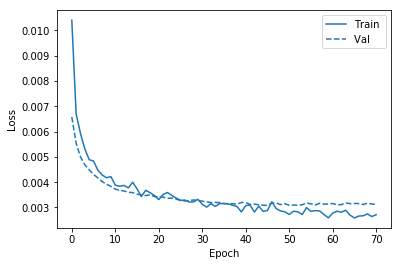

In [360]:
plot_loss(hist, "", 0)

In [361]:
y_pred_prob_nn = model.predict(X_test, batch_size=BATCH_SIZE)

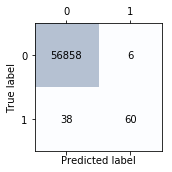

Precision Score: 0.909
Recall Score: 0.612


In [362]:
plot_confusion_matrix(y_test, y_pred_prob_nn > 0.5)

[-1.0, 100, 80, 100]

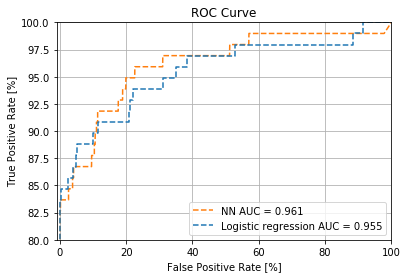

In [363]:
plot_roc_curve("NN", y_test, y_pred_prob_nn, color=colors[1], linestyle='--')
plot_roc_curve("Logistic regression", y_test, y_pred_prob_logreg, color=colors[0], linestyle='--')
plt.legend(loc='lower right')
plt.axis([-1.,100,80,100])

### Upsampling

In [364]:
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, stratify=y_train, random_state=123)

In [295]:
from sklearn.utils import resample

#combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)
# separate minority and majority classes
negative = train_data[train_data.Class==0]
positive = train_data[train_data.Class==1]
# upsample minority
pos_upsampled = resample(positive,replace=True, n_samples=len(negative),random_state=123) 
# combine majority and upsampled minority
upsampled = pd.concat([negative, pos_upsampled])
# check new class counts
upsampled.Class.value_counts()

1    227451
0    227451
Name: Class, dtype: int64

In [296]:
X_train = upsampled.drop('Class', axis=1)
y_train = upsampled['Class'].values.ravel()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [273]:
model_up = Sequential()
model_up.add(Dense(units=16, input_shape=(X_train.shape[-1],), activation='relu'))
model_up.add(Dropout(0.2))
model_up.add(Dense(units=1, activation='sigmoid',bias_initializer=None))

model_up.summary()

## compile:
model_up.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 16)                480       
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [274]:
## train:
hist_up = model_up.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(X_test, y_test.values.ravel()))

Train on 454902 samples, validate on 56962 samples
Epoch 1/100
454902/454902 [==============================] - 3s 8us/sample - loss: 0.2772 - tp: 200578.0000 - fp: 25567.0000 - tn: 201884.0000 - fn: 26873.0000 - accuracy: 0.8847 - precision: 0.8869 - recall: 0.8819 - auc: 0.9515 - val_loss: 0.1073 - val_tp: 82.0000 - val_fp: 702.0000 - val_tn: 56162.0000 - val_fn: 16.0000 - val_accuracy: 0.9874 - val_precision: 0.1046 - val_recall: 0.8367 - val_auc: 0.9679
Epoch 2/100
454902/454902 [==============================] - 1s 3us/sample - loss: 0.1517 - tp: 208745.0000 - fp: 5398.0000 - tn: 222053.0000 - fn: 18706.0000 - accuracy: 0.9470 - precision: 0.9748 - recall: 0.9178 - auc: 0.9816 - val_loss: 0.0872 - val_tp: 83.0000 - val_fp: 820.0000 - val_tn: 56044.0000 - val_fn: 15.0000 - val_accuracy: 0.9853 - val_precision: 0.0919 - val_recall: 0.8469 - val_auc: 0.9715
Epoch 3/100
454902/454902 [==============================] - 1s 3us/sample - loss: 0.1315 - tp: 212380.0000 - fp: 5640.0000 - tn

Epoch 21/100
454902/454902 [==============================] - 1s 3us/sample - loss: 0.0528 - tp: 223211.0000 - fp: 4002.0000 - tn: 223449.0000 - fn: 4240.0000 - accuracy: 0.9819 - precision: 0.9824 - recall: 0.9814 - auc: 0.9983 - val_loss: 0.0431 - val_tp: 83.0000 - val_fp: 597.0000 - val_tn: 56267.0000 - val_fn: 15.0000 - val_accuracy: 0.9893 - val_precision: 0.1221 - val_recall: 0.8469 - val_auc: 0.9486
Epoch 22/100
454902/454902 [==============================] - 1s 3us/sample - loss: 0.0506 - tp: 223868.0000 - fp: 3827.0000 - tn: 223624.0000 - fn: 3583.0000 - accuracy: 0.9837 - precision: 0.9832 - recall: 0.9842 - auc: 0.9984 - val_loss: 0.0437 - val_tp: 83.0000 - val_fp: 616.0000 - val_tn: 56248.0000 - val_fn: 15.0000 - val_accuracy: 0.9889 - val_precision: 0.1187 - val_recall: 0.8469 - val_auc: 0.9452
Epoch 23/100
454902/454902 [==============================] - 1s 3us/sample - loss: 0.0496 - tp: 223919.0000 - fp: 3776.0000 - tn: 223675.0000 - fn: 3532.0000 - accuracy: 0.9839 - 

Epoch 41/100
454902/454902 [==============================] - 1s 3us/sample - loss: 0.0325 - tp: 226052.0000 - fp: 3177.0000 - tn: 224274.0000 - fn: 1399.0000 - accuracy: 0.9899 - precision: 0.9861 - recall: 0.9938 - auc: 0.9992 - val_loss: 0.0332 - val_tp: 83.0000 - val_fp: 438.0000 - val_tn: 56426.0000 - val_fn: 15.0000 - val_accuracy: 0.9920 - val_precision: 0.1593 - val_recall: 0.8469 - val_auc: 0.9284
Epoch 42/100
454902/454902 [==============================] - 1s 3us/sample - loss: 0.0322 - tp: 226085.0000 - fp: 3205.0000 - tn: 224246.0000 - fn: 1366.0000 - accuracy: 0.9900 - precision: 0.9860 - recall: 0.9940 - auc: 0.9992 - val_loss: 0.0327 - val_tp: 83.0000 - val_fp: 433.0000 - val_tn: 56431.0000 - val_fn: 15.0000 - val_accuracy: 0.9921 - val_precision: 0.1609 - val_recall: 0.8469 - val_auc: 0.9286
Epoch 43/100
454902/454902 [==============================] - 1s 3us/sample - loss: 0.0320 - tp: 226033.0000 - fp: 3172.0000 - tn: 224279.0000 - fn: 1418.0000 - accuracy: 0.9899 - 

Epoch 61/100
454902/454902 [==============================] - 1s 3us/sample - loss: 0.0265 - tp: 226470.0000 - fp: 2983.0000 - tn: 224468.0000 - fn: 981.0000 - accuracy: 0.9913 - precision: 0.9870 - recall: 0.9957 - auc: 0.9994 - val_loss: 0.0331 - val_tp: 82.0000 - val_fp: 350.0000 - val_tn: 56514.0000 - val_fn: 16.0000 - val_accuracy: 0.9936 - val_precision: 0.1898 - val_recall: 0.8367 - val_auc: 0.9208
Epoch 62/100
454902/454902 [==============================] - 1s 3us/sample - loss: 0.0265 - tp: 226448.0000 - fp: 2959.0000 - tn: 224492.0000 - fn: 1003.0000 - accuracy: 0.9913 - precision: 0.9871 - recall: 0.9956 - auc: 0.9993 - val_loss: 0.0331 - val_tp: 82.0000 - val_fp: 355.0000 - val_tn: 56509.0000 - val_fn: 16.0000 - val_accuracy: 0.9935 - val_precision: 0.1876 - val_recall: 0.8367 - val_auc: 0.9208
Epoch 63/100
454902/454902 [==============================] - 1s 2us/sample - loss: 0.0261 - tp: 226483.0000 - fp: 2959.0000 - tn: 224492.0000 - fn: 968.0000 - accuracy: 0.9914 - pr

Epoch 81/100
454902/454902 [==============================] - 1s 3us/sample - loss: 0.0238 - tp: 226445.0000 - fp: 2819.0000 - tn: 224632.0000 - fn: 1006.0000 - accuracy: 0.9916 - precision: 0.9877 - recall: 0.9956 - auc: 0.9994 - val_loss: 0.0359 - val_tp: 81.0000 - val_fp: 317.0000 - val_tn: 56547.0000 - val_fn: 17.0000 - val_accuracy: 0.9941 - val_precision: 0.2035 - val_recall: 0.8265 - val_auc: 0.9163
Epoch 00081: early stopping


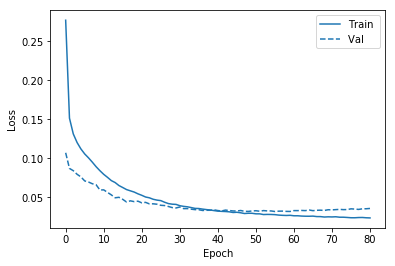

In [275]:
plot_loss(hist_up, "", 0)

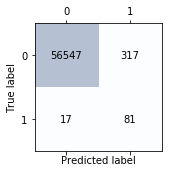

Precision Score: 0.204
Recall Score: 0.827


In [288]:
y_pred_prob_nn_up = model_up.predict(X_test, batch_size=BATCH_SIZE)
plot_confusion_matrix(y_test, y_pred_prob_nn_up > 0.5)

[-1.0, 100, 80, 100]

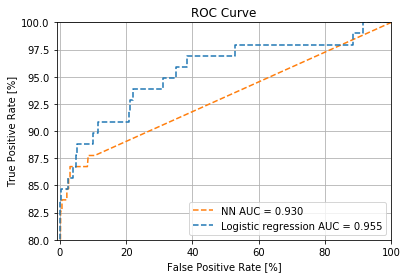

In [282]:
plot_roc_curve("NN", y_test, y_pred_prob_nn_up, color=colors[1], linestyle='--')
plot_roc_curve("Logistic regression", y_test, y_pred_prob_logreg, color=colors[0], linestyle='--')
plt.legend(loc='lower right')
plt.axis([-1.,100,80,100])

### downsampling

In [311]:
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=123)

In [312]:
#combine them back for resampling
train_data = pd.concat([X_train, y_train], axis=1)
# separate minority and majority classes
negative = train_data[train_data.Class==0]
positive = train_data[train_data.Class==1]

# dnsample majority
neg_downsampled = resample(negative, replace=True, n_samples=len(positive)*8, random_state=123) # reproducible results
# combine minority and downsampled majority
downsampled = pd.concat([positive, neg_downsampled])
# check new class counts
downsampled.Class.value_counts()

0    3152
1     394
Name: Class, dtype: int64

In [314]:
X_train = downsampled.drop('Class', axis=1)
y_train = downsampled['Class'].values.ravel()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [317]:
model_dn = Sequential()
model_dn.add(Dense(units=16, input_shape=(X_train.shape[-1],), activation='relu'))
model_dn.add(Dropout(0.2))
model_dn.add(Dense(units=1, activation='sigmoid',bias_initializer=None))

model_dn.summary()

## compile:
model_dn.compile(optimizer=tf.keras.optimizers.Adam(lr=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=METRICS)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                480       
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [318]:
## train:
hist_dn = model_dn.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(X_test, y_test.values.ravel()))

Train on 3546 samples, validate on 56962 samples
Epoch 1/100
3546/3546 [==============================] - 2s 531us/sample - loss: 0.5886 - tp: 55.0000 - fp: 289.0000 - tn: 2863.0000 - fn: 339.0000 - accuracy: 0.8229 - precision: 0.1599 - recall: 0.1396 - auc: 0.3125 - val_loss: 0.3397 - val_tp: 7.0000 - val_fp: 3408.0000 - val_tn: 53456.0000 - val_fn: 91.0000 - val_accuracy: 0.9386 - val_precision: 0.0020 - val_recall: 0.0714 - val_auc: 0.3694
Epoch 2/100
3546/3546 [==============================] - 0s 40us/sample - loss: 0.5547 - tp: 58.0000 - fp: 243.0000 - tn: 2909.0000 - fn: 336.0000 - accuracy: 0.8367 - precision: 0.1927 - recall: 0.1472 - auc: 0.3612 - val_loss: 0.3192 - val_tp: 9.0000 - val_fp: 2826.0000 - val_tn: 54038.0000 - val_fn: 89.0000 - val_accuracy: 0.9488 - val_precision: 0.0032 - val_recall: 0.0918 - val_auc: 0.4072
Epoch 3/100
3546/3546 [==============================] - 0s 39us/sample - loss: 0.5145 - tp: 80.0000 - fp: 211.0000 - tn: 2941.0000 - fn: 314.0000 - accur

Epoch 42/100
3546/3546 [==============================] - 0s 42us/sample - loss: 0.1428 - tp: 300.0000 - fp: 4.0000 - tn: 3148.0000 - fn: 94.0000 - accuracy: 0.9724 - precision: 0.9868 - recall: 0.7614 - auc: 0.9246 - val_loss: 0.0585 - val_tp: 39.0000 - val_fp: 117.0000 - val_tn: 56747.0000 - val_fn: 59.0000 - val_accuracy: 0.9969 - val_precision: 0.2500 - val_recall: 0.3980 - val_auc: 0.8128
Epoch 43/100
3546/3546 [==============================] - 0s 41us/sample - loss: 0.1334 - tp: 308.0000 - fp: 4.0000 - tn: 3148.0000 - fn: 86.0000 - accuracy: 0.9746 - precision: 0.9872 - recall: 0.7817 - auc: 0.9350 - val_loss: 0.0569 - val_tp: 39.0000 - val_fp: 115.0000 - val_tn: 56749.0000 - val_fn: 59.0000 - val_accuracy: 0.9969 - val_precision: 0.2532 - val_recall: 0.3980 - val_auc: 0.8166
Epoch 44/100
3546/3546 [==============================] - 0s 41us/sample - loss: 0.1370 - tp: 311.0000 - fp: 3.0000 - tn: 3149.0000 - fn: 83.0000 - accuracy: 0.9757 - precision: 0.9904 - recall: 0.7893 - au

Epoch 63/100
3546/3546 [==============================] - 0s 40us/sample - loss: 0.1079 - tp: 318.0000 - fp: 4.0000 - tn: 3148.0000 - fn: 76.0000 - accuracy: 0.9774 - precision: 0.9876 - recall: 0.8071 - auc: 0.9435 - val_loss: 0.0370 - val_tp: 40.0000 - val_fp: 98.0000 - val_tn: 56766.0000 - val_fn: 58.0000 - val_accuracy: 0.9973 - val_precision: 0.2899 - val_recall: 0.4082 - val_auc: 0.8574
Epoch 64/100
3546/3546 [==============================] - 0s 39us/sample - loss: 0.1052 - tp: 320.0000 - fp: 1.0000 - tn: 3151.0000 - fn: 74.0000 - accuracy: 0.9788 - precision: 0.9969 - recall: 0.8122 - auc: 0.9461 - val_loss: 0.0364 - val_tp: 40.0000 - val_fp: 98.0000 - val_tn: 56766.0000 - val_fn: 58.0000 - val_accuracy: 0.9973 - val_precision: 0.2899 - val_recall: 0.4082 - val_auc: 0.8596
Epoch 65/100
3546/3546 [==============================] - 0s 40us/sample - loss: 0.1086 - tp: 320.0000 - fp: 3.0000 - tn: 3149.0000 - fn: 74.0000 - accuracy: 0.9783 - precision: 0.9907 - recall: 0.8122 - auc:

Epoch 84/100
3546/3546 [==============================] - 0s 39us/sample - loss: 0.0878 - tp: 326.0000 - fp: 1.0000 - tn: 3151.0000 - fn: 68.0000 - accuracy: 0.9805 - precision: 0.9969 - recall: 0.8274 - auc: 0.9624 - val_loss: 0.0289 - val_tp: 43.0000 - val_fp: 96.0000 - val_tn: 56768.0000 - val_fn: 55.0000 - val_accuracy: 0.9973 - val_precision: 0.3094 - val_recall: 0.4388 - val_auc: 0.8855
Epoch 85/100
3546/3546 [==============================] - 0s 38us/sample - loss: 0.0876 - tp: 325.0000 - fp: 5.0000 - tn: 3147.0000 - fn: 69.0000 - accuracy: 0.9791 - precision: 0.9848 - recall: 0.8249 - auc: 0.9645 - val_loss: 0.0287 - val_tp: 43.0000 - val_fp: 97.0000 - val_tn: 56767.0000 - val_fn: 55.0000 - val_accuracy: 0.9973 - val_precision: 0.3071 - val_recall: 0.4388 - val_auc: 0.8869
Epoch 86/100
3546/3546 [==============================] - 0s 42us/sample - loss: 0.0888 - tp: 321.0000 - fp: 3.0000 - tn: 3149.0000 - fn: 73.0000 - accuracy: 0.9786 - precision: 0.9907 - recall: 0.8147 - auc:

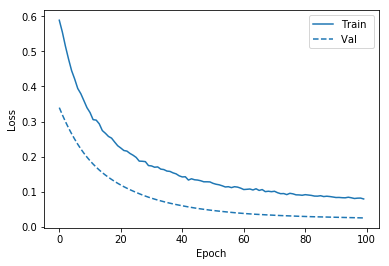

In [319]:
plot_loss(hist_dn, "", 0)

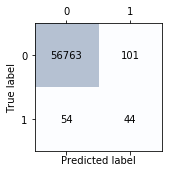

Precision Score: 0.303
Recall Score: 0.449


In [320]:
y_pred_prob_nn_dn = model_dn.predict(X_test, batch_size=BATCH_SIZE)
plot_confusion_matrix(y_test, y_pred_prob_nn_dn > 0.5)

[-1.0, 100, 80, 100]

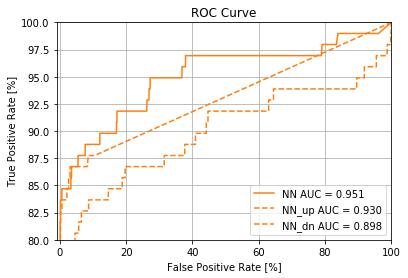

In [325]:
plot_roc_curve("NN", y_test, y_pred_prob_nn, color=colors[1], linestyle='-')
plot_roc_curve("NN_up", y_test, y_pred_prob_nn_up, color=colors[1], linestyle='--')
plot_roc_curve("NN_dn", y_test, y_pred_prob_nn_dn, color=colors[1], linestyle='--')
#plot_roc_curve("Logistic regression", y_test, y_pred_prob_logreg, color=colors[0], linestyle='-')
#plot_roc_curve("Logistic regression up", y_test, y_pred_prob_logreg, color=colors[0], linestyle='--')
#plot_roc_curve("Logistic regression dn", y_test, y_pred_prob_logreg, color=colors[0], linestyle='--')
plt.legend(loc='lower right')
plt.axis([-1.,100,80,100])